# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Herramientas basicas de visualización de datos 


## **Trabajo final**


**Universidad Privada Boliviana**<br/>
**Diplomado en Machine Learning y Ciencia de Datos**<br/>


## 🎵 Quiz de Spotify
Responde las preguntas a continuación utilizando el conjunto de datos `spotify_artists.csv` proporcionado.

NOTA: Todas las respuestas deben basarse en el conjunto de datos proporcionado.

In [134]:
#importa la biblioteca pandas

import pandas as pd

In [135]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:

#lee el archivo spotify_artists.csv en un dataframe
df=pd.read_csv('spotify_artists.csv')
df.shape


(163661, 8)

In [137]:
# echa un vistazo rápido a los datos con df.head()
df.head()

,name,artist,year,duration_ms,popularity,energy,danceability,tempo
0,Singende Bataillone 1. Teil,Carl Woitschach,1928,158648,0,0.1950,0.708,118.469
1,"Fantasiestücke, Op. 111: Più tosto lento",Robert Schumann,1928,282133,0,0.0135,0.379,83.972
2,Chapter 1.18 - Zamek kaniowski,Seweryn Goszczyński,1928,104300,0,0.2200,0.749,107.177
3,Bebamos Juntos - Instrumental (Remasterizado),Francisco Canaro,1928,180760,0,0.1300,0.781,108.003
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61",NaN,1928,687733,1,0.2040,0.210,62.149


### 1. ¿Cuántas canciones se encuentran en el dataframe?"""


In [138]:
# tu código aquí
answer1=df['name'].count()
print(f"Se encuentran {answer1} canciones en el dataframe")


Se encuentran 163661 canciones en el dataframe


In [139]:

#Echa un vistazo a tu respuesta para ver si tiene sentido

print(df.count())
print("Realizando un analisis parece que la mejor opcion para contar las canciones es contar por la columna name")


name            163661
artist          162790
year            163661
duration_ms     163661
popularity      163661
energy          163661
danceability    163661
tempo           163661
dtype: int64
Realizando un analisis parece que la mejor opcion para contar las canciones es contar por la columna name


### 2. ¿Cuántos días tomaría escuchar todas las canciones en este conjunto de datos?

NOTA: Redondea la respuesta al número entero más cercano


In [140]:
#tu código aquí

answer2 = round(df['duration_ms'].sum()/(1000*60*60*24))
print(f"Se tardará en escuhar todas las cnaciones del conjuntos de datos un total de {answer2} días")



Se tardará en escuhar todas las cnaciones del conjuntos de datos un total de 437 días


In [141]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
tiempo_acumuluado_ms=df['duration_ms'].sum()
tiempo_acumulado_s=tiempo_acumuluado_ms/1000
tiempo_acumulado_m=tiempo_acumulado_s/60
tiempo_acumulado_h=tiempo_acumulado_m/60
tiempo_acumulado_d=tiempo_acumulado_h/24
print(f"{tiempo_acumulado_d} dias")


437.2130871180556 dias


### 3. En el dataframe, ¿cuántas canciones tienen el título "Love" (coincidencia exacta)?


In [142]:
#tu código aquí
palabra_a_buscar='Love'
canitidad_de_canciones_llamadas_Love=(df['name']==palabra_a_buscar).sum()

answer3 = canitidad_de_canciones_llamadas_Love
print(f"Existen {canitidad_de_canciones_llamadas_Love} canciones que tienen el título {palabra_a_buscar}")

Existen 18 canciones que tienen el título Love


### 4. ¿Qué artista creó la canción más popular titulada "Love"?

Para ordenar una serie por valores hemos utilizado:
`serie.sort_values()`

Para un dataframe, df.sort_values() requiere ademas la columna especifica utilizar como argumento: 

`df.sort_values(by='Nombre de la columna')`

Puedes ver la documentacion para obtener mas informacion [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)


In [143]:
#tu código aquí
palabra_a_buscar='Love'
filtro_tituladas_love=df['name']==palabra_a_buscar
df_ordenado_por_popularidad=df[filtro_tituladas_love].sort_values(by='popularity',ascending=False)
answer4 = df_ordenado_por_popularidad['artist'].head(1).values[0]
print(f"El artista con la canción más popular llamada {palabra_a_buscar} es {answer4}")

El artista con la canción más popular llamada Love es Lana Del Rey


In [144]:
#Echa un vistazo a tu respuesta para ver si tiene sentido

print("tuve que usar values[0] para que me devolviera el valor de la columna artist, asi como se manejas las series")
df_ordenado_por_popularidad[['artist','name','popularity']].head()


tuve que usar values[0] para que me devolviera el valor de la columna artist, asi como se manejas las series


,artist,name,popularity
147418,Lana Del Rey,Love,70
112124,Zoé,Love,69
147497,Koe Wetzel,Love,60
37926,Musiq Soulchild,Love,50
128251,The Art Of Noise,Love,43


### 5. ¿En qué década se lanzaron la mayoría de las canciones?

SUGERENCIA: Deberás encontrar el número total de canciones lanzadas en cada década y proceder a partir de ahí.

NOTA: si tu respuesta es los 80, la respuesta debe ser 1980.

In [145]:
# tu código aquí

df['decada']=df['year']//10*10
canciones_por_decada=df['decada'].value_counts()
decada_con_mas_lanzamientos=canciones_por_decada.sort_values(ascending=False).head(1)
decada = decada_con_mas_lanzamientos.index[0] 
cantidad_canciones = decada_con_mas_lanzamientos.iloc[0]
answer5 = decada
print(f"La decada con más lanzamientos es {answer5} con {cantidad_canciones} canciones")

La decada con más lanzamientos es 1990 con 19505 canciones


### 6. ¿Qué columna tiene datos faltantes?
SUGERENCIA: Puedes revisar el metodo df.isnull() o df.isna()


In [146]:
#tu código aquí
columna_con_datos_faltantes=df.isnull().sum().sort_values(ascending=False).head(1)
answer6 = columna_con_datos_faltantes.index[0]
print(f"La columna que tiene más datos faltantes es: {answer6} con {columna_con_datos_faltantes.values[0]} datos faltantes")


La columna que tiene más datos faltantes es: artist con 871 datos faltantes


In [147]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print("Haciendo esta comparación se puede ver que artist suma 871 valores nulos")
df.isnull().sum()

Haciendo esta comparación se puede ver que artist suma 871 valores nulos


name              0
artist          871
year              0
duration_ms       0
popularity        0
energy            0
danceability      0
tempo             0
decada            0
dtype: int64

#### Elimina todos los valores faltantes para responder al siguiente conjunto de preguntas.

Si el dataframe contiene valores faltantes, puedes eliminarlos utilizando el siguiente método:

`df.dropna(inplace=True)`

Este método busca elementos faltantes en el dataframe y, si encuentra alguno, elimina toda la fila correspondiente a la celda faltante.

Puedes encontrar más información en la documentación 
[here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna)

In [148]:
# tu código aquí
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(163661, 9)
(162790, 9)


In [149]:
# compruebo el tamaño anterior a borrar con la cantidad de nulos en artist y da lo mismo 
163661-871


162790

### 7. Analisis del tempo de las canciones

Utilizar el comando `print(f"...")` donde corresponda para responder a las siguientes preguntas

Para los artistas con una popularidad mayor a 90 y cuyas canciones han sido lanzadas despues del 2015, encontrar la siguiente informacion:

- ¿Cuál es la canción más rápida en términos de tempo y en qué año fue lanzada?
- ¿Cuál es la canción más lenta en términos de tempo y en qué año fue lanzada?
- ¿Graficar el numero de canciones que fueron lanzadas por año y identificar cuál fue año con más canciones?


La canción más rápida por su tempo es Stuck with U (with Justin Bieber) en el año 2020
La canción más lenta por su tempo es HIGHEST IN THE ROOM en el año 2019


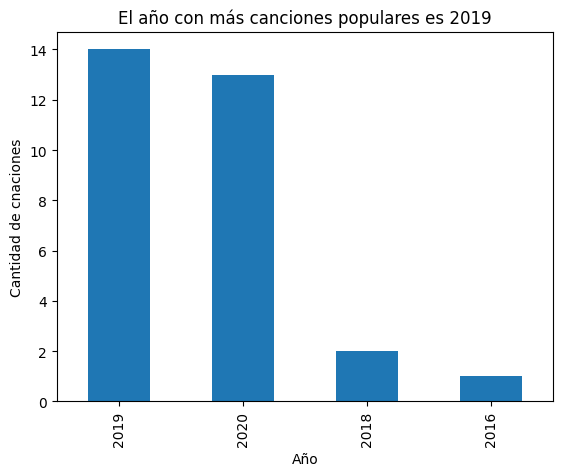

El año con más canciones lanzadas fue 2019 con 14 canciones


In [175]:
# tu código aquí
filtro_popularidad_decada=(df['popularity']>90) & (df['year']>2015)
df_filtrado=df[filtro_popularidad_decada]

cancion_mas_rapida=df_filtrado.sort_values(by='tempo',ascending=False).head(1)
print(f"La canción más rápida por su tempo es {cancion_mas_rapida['name'].values[0]} en el año {cancion_mas_rapida['year'].values[0]}")

cancion_mas_lenta=df_filtrado.sort_values(by='tempo',ascending=True).head(1)
print(f"La canción más lenta por su tempo es {cancion_mas_lenta['name'].values[0]} en el año {cancion_mas_lenta['year'].values[0]}")

numero_canciones_por_anho=df_filtrado['year'].value_counts()
numero_canciones_por_anho.sort_values(ascending=False).plot(kind='bar')
plt.title(f"El año con más canciones populares es {numero_canciones_por_anho.idxmax()}")
plt.ylabel("Cantidad de cnaciones")
plt.xlabel("Año")
plt.show()
ano_con_mas_canciones_lanzadas=numero_canciones_por_anho.sort_values(ascending=False).head(1)
print(f"El año con más canciones lanzadas fue {ano_con_mas_canciones_lanzadas.index[0]} con {ano_con_mas_canciones_lanzadas.values[0]} canciones")
# answer7 = ___


### 8. Analisis del tiempo de duracion de las canciones
Utilizar el comando `print(f"...")` para responder a las siguientes preguntas

- ¿Cuál es la canción más larga en términos de duración en milisegundos y quién es el artista que la interpreta?

- ¿Cuál es la canción más popular en términos de valor de popularidad y en qué año fue lanzada?

In [177]:
#tu código aquí
cancion_mas_larga=df.sort_values(by='duration_ms',ascending=False).head(1)
print(f"La canción más larga se llama {cancion_mas_larga['name'].values[0]}, es del artista {cancion_mas_larga['artist'].values[0]} y dura {cancion_mas_larga['duration_ms'].values[0]} ms")

cancion_mas_popular=df.sort_values(by='popularity',ascending=False).head(1)
print(f"La canción más popular se llama {cancion_mas_popular['name'].values[0]}, salió en el año {cancion_mas_popular['year'].values[0]} y tiene la popularidad de {cancion_mas_popular['popularity'].values[0]} ms")




La canción más larga se llama Brown Noise - 90 Minutes, es del artista Sound Dreamer y dura 5403500 ms
La canción más popular se llama death bed (coffee for your head) (feat. beabadoobee), salió en el año 2020 y tiene la popularidad de 97 ms


### 9. ¿Cuál es la canción más enérgica de Michael Jackson?

In [152]:
#tu código aquí
filtro_michael_jackson=df['artist']=='Michael Jackson'
cancion_mas_energetica_de_michael_jackson=df[filtro_michael_jackson].sort_values(by='energy',ascending=False).head(1)
answer9=cancion_mas_energetica_de_michael_jackson
print(f"La canción más enérgica de Michael Jackson es {answer9['name'].values[0]} con un valor de {answer9['energy'].values[0]} en la columna energy")

La canción más enérgica de Michael Jackson es Smooth Criminal - 2012 Remaster con un valor de 0.981 en la columna energy


### 10 ¿Qué artista ha lanzado la mayor cantidad de canciones desde 1960?


In [178]:
# tu código aquí
filtro_1960=df['year']>=1960
canciones_desde_1960=df[filtro_1960]
artista_con_mas_canciones_desde_1960=canciones_desde_1960['artist'].value_counts().head(1)
answer10=artista_con_mas_canciones_desde_1960.index[0]
print(f"El artista con más canciones desde 1960 es {answer10}, con {artista_con_mas_canciones_desde_1960.values[0]} canciones")

El artista con más canciones desde 1960 es Bob Dylan, con 550 canciones


### 11 Para el artista de la pregunta anterior, ¿cuál es la canción más popular?

In [154]:
# tu código aquí
filtro_artista=df['artist']==artista_con_mas_canciones_desde_1960.index[0]
cancion_mas_popluar_artista=df[filtro_artista].sort_values(by='popularity',ascending=False).head(1)
answer11=cancion_mas_popluar_artista['name'].values[0]
print(f"La canción más popular del artista con más canciones desde 1960 es: {answer11}, con una popularidad de {cancion_mas_popluar_artista['popularity'].values[0]}")
#

La canción más popular del artista con más canciones desde 1960 es: Knockin' On Heaven's Door, con una popularidad de 74


### 12. Crear un playlist con las canciones mas populares

Crea una `lista` de reproducción con la canción más popular de cada año desde 1980 hasta 2020.

El resultado debe ser de tipo List con 41 valores de tipo str (una canción para cada año)
p.ej. ['cancion1', 'cancion2', 'cancion3', ...]
NOTA: En caso de empates, elige la canción con el valor más alto de energy.

In [188]:
# tu código aquí
filtro_anhons=(df['year']>=1980)& (df['year']<=2020)
df_filtrado=df[filtro_anhons]

answer_12=[
    (
        df[df['year']==anio]
        .sort_values(by=['popularity','energy'],ascending=(False,False))
        .head(1)
        .name
        .values[0]     
    ) 
    for anio in df_filtrado.year.unique()
]

answer_12

['Back In Black',
 "Don't Stop Believin'",
 'Africa',
 'Every Breath You Take',
 'Wake Me up Before You Go-Go',
 'Take on Me',
 "Livin' On A Prayer",
 'I Wanna Dance with Somebody (Who Loves Me)',
 'Fast Car',
 "Free Fallin'",
 'Thunderstruck',
 'Under the Bridge',
 'Killing In The Name',
 'Creep',
 'Basket Case',
 "Gangsta's Paradise",
 'Wannabe',
 'Bitter Sweet Symphony',
 "The Kids Aren't Alright",
 'Californication',
 'In the End',
 'Chop Suey!',
 "'Till I Collapse",
 'Numb',
 'Yeah! (feat. Lil Jon & Ludacris)',
 "Hips Don't Lie (feat. Wyclef Jean)",
 'Snow (Hey Oh)',
 'Stronger',
 'Umbrella',
 'Bad Romance',
 'Hey, Soul Sister',
 'Pumped Up Kicks',
 "Can't Hold Us - feat. Ray Dalton",
 'All of Me',
 'Photograph',
 'Play Date',
 'goosebumps',
 'Believer',
 'SICKO MODE',
 'ily (i love you baby) (feat. Emilee)',
 'death bed (coffee for your head) (feat. beabadoobee)']

In [189]:
lista=[]
for anio in df_filtrado.year.unique():
    cancion=(df[df['year']==anio]
        .sort_values(by=['popularity','energy'],ascending=False)
        .head(1)
        .name
        .values[0])
    lista.append(cancion)
lista

['Back In Black',
 "Don't Stop Believin'",
 'Africa',
 'Every Breath You Take',
 'Wake Me up Before You Go-Go',
 'Take on Me',
 "Livin' On A Prayer",
 'I Wanna Dance with Somebody (Who Loves Me)',
 'Fast Car',
 "Free Fallin'",
 'Thunderstruck',
 'Under the Bridge',
 'Killing In The Name',
 'Creep',
 'Basket Case',
 "Gangsta's Paradise",
 'Wannabe',
 'Bitter Sweet Symphony',
 "The Kids Aren't Alright",
 'Californication',
 'In the End',
 'Chop Suey!',
 "'Till I Collapse",
 'Numb',
 'Yeah! (feat. Lil Jon & Ludacris)',
 "Hips Don't Lie (feat. Wyclef Jean)",
 'Snow (Hey Oh)',
 'Stronger',
 'Umbrella',
 'Bad Romance',
 'Hey, Soul Sister',
 'Pumped Up Kicks',
 "Can't Hold Us - feat. Ray Dalton",
 'All of Me',
 'Photograph',
 'Play Date',
 'goosebumps',
 'Believer',
 'SICKO MODE',
 'ily (i love you baby) (feat. Emilee)',
 'death bed (coffee for your head) (feat. beabadoobee)']

### 13 ¿Cómo se distribuye la popularidad de las canciones en forma de histograma?
Crea un grafico para responder esta pregunta


In [157]:
# tu código aquí
# df['popularity'].plot(kind='hist',bins=10)
# print("Aqui podemos obesrvar la distribución de canciones agrupadas por popularidad")

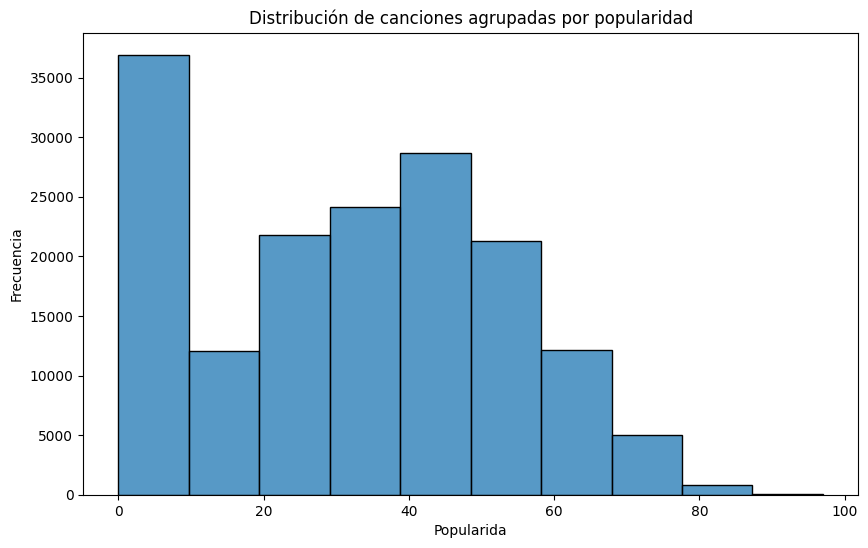

In [158]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='popularity',bins=10)
plt.ylabel("Frecuencia")
plt.xlabel("Popularida")
plt.title("Distribución de canciones agrupadas por popularidad")
plt.show()

Observando el gráfico podemos observar:
-   Una mayor cantidad de canciones que no sobrepasan los 10 puntos en popularidad, este grupo comprende más de 3500 canciones del conjunto.
-   otro grupo grande de canciones que tienen una popularidad entre 40 y 50 puntos que representan poco menos de 3000 canciones del conjunto.
-   otro grupo muy reducido de cancoines que sobrepasand los 80 puntos de popularidad que no son ni 500 canciones del conjunto

### 14 ¿existe una correlación entre la duración de las canciones y su nivel de energía? Representa esta relación en un scatter plot.
Crea un grafico para responder esta pregunta

In [159]:
# # tu código aquí

# df.plot(kind='scatter', x='duration_ms', y='energy', alpha=0.5)
# print("Mirando la gráfica no parece reprsentar una correlación entre la duración y la energía de las canciones")

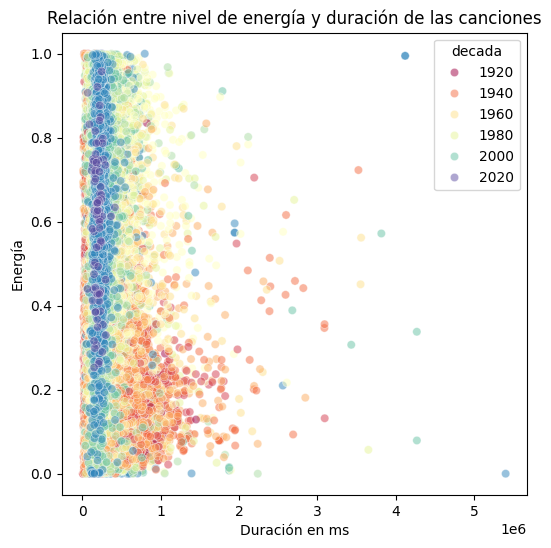

In [198]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='duration_ms',y='energy',alpha=0.5,color='green',hue='decada',palette='Spectral')
plt.title("Relación entre nivel de energía y duración de las canciones")
plt.ylabel("Energía")
plt.xlabel("Duración en ms")
plt.show()

Podemos observar:
-   La mayor cantidad de canciones presentan una duración de menor a 100000 milisegundos
-   Las canciones cuanto más aumentan su duración, no tienen tantan energía enegía y se puede ver desde los 200000 ms que ya son pocas canciones las que superan 0.6 de energía
-   Exceptuando el caso de una canción podriamos decir que las canciones que más energía tienen, tienen menor duración

### 15 ¿Cuál es la distribución de la danceability de las canciones en función del año de lanzamiento? 
Crea un gráfico de barras para mostrar esta distribución.

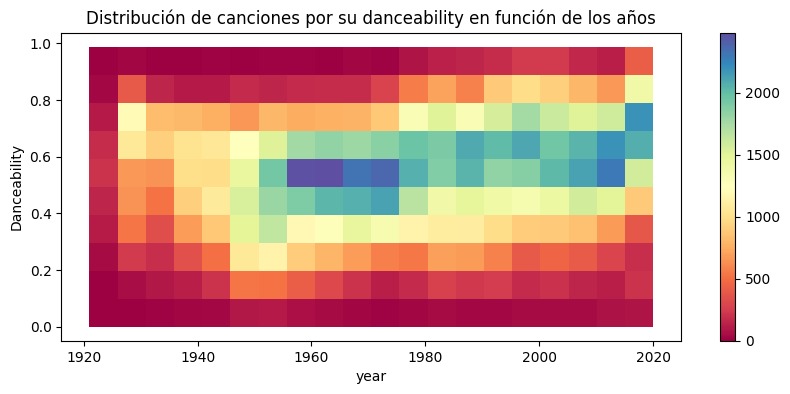

In [207]:
plt.figure(figsize=(10,4))
sns.histplot(
    data=df,
    x='year', 
    y='danceability',
    bins=(20, 10),  # 20 bins para años, 10 para danceability
    cmap='Spectral',
    cbar=True
)
plt.title("Distribución de canciones por su danceability en función de los años")
plt.ylabel("Danceability")
plt.show()

Podrimoas observar:
- Existe un grupo de canciones con mayor daceability con un valor entre 0.4 y 0.7 en entre los años 1960 a 1980
- Tambien se observa una acumulacion de canciones con mayor daceability en un ranto de 0.4 a 0.8 desde los años 1950 hasta la actualidad


### 16 ¿Cómo varía el tempo de las canciones a lo largo de los años?
Representa esta variación utilizando un gráfico de línea.


In [163]:
# tempo_promedio_por_ano = df.groupby('year')['tempo'].mean()
# tempo_promedio_por_ano.plot(kind='line', figsize=(10, 6), marker='o')
# print(type(tempo_promedio_por_ano))

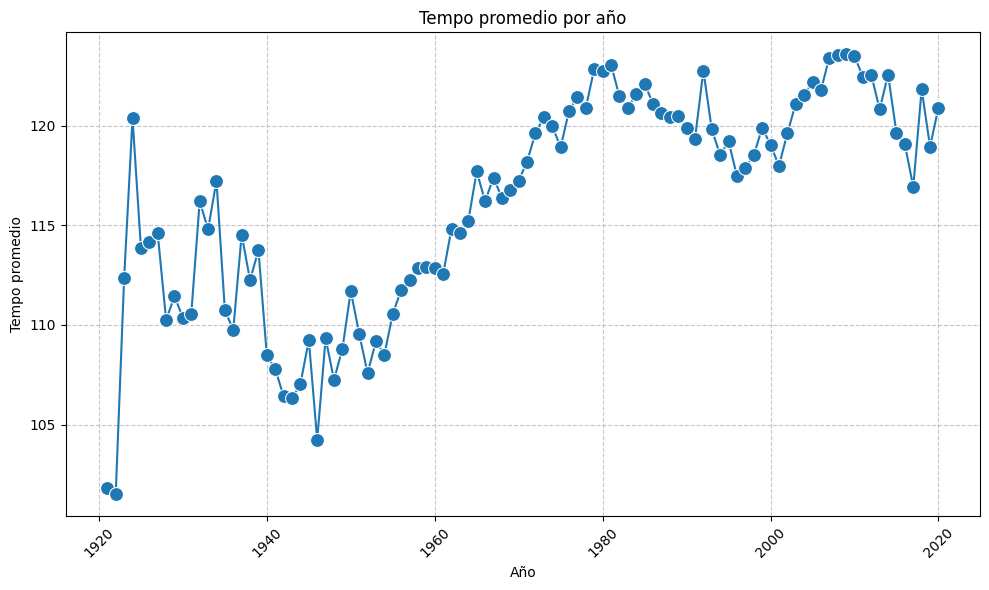

In [164]:
tempo_promedio_por_ano = df.groupby('year')['tempo'].mean()
tempo_promedio_df = tempo_promedio_por_ano.reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=tempo_promedio_df,
    x='year',
    y='tempo',
    marker='o',
    markersize=10
)

plt.title('Tempo promedio por año')
plt.xlabel('Año')
plt.ylabel('Tempo promedio')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar:
-   Que empezamos un cun tempo promedio muy bajo en los años 1920, pero a pesar de algunos años, podriamos decir que las canciones aumentaron tu tempo promedio a los largo de los años de manera gradual hasta la actualidad.
-   Podemos observar también dos puntos bajos en el tempo promedio, los años 1920-1921 inicialmente y en el año 1946 donde despues de una tendencía a subir el tempo promedio, existe un bajón en el promedio como el tercer punto mas bajo en los años
-   Despues del años 1946 podemos observar un incremento gradual hasta el punto más alto en los año 2007 a 2010, donde despues cominza a bajar el promedio pero se mantiene en un nivel alto

### 17 ¿Cuál es la relación entre la popularidad y la energía de las canciones?
Crea un scatter plot para visualizar esta relación.


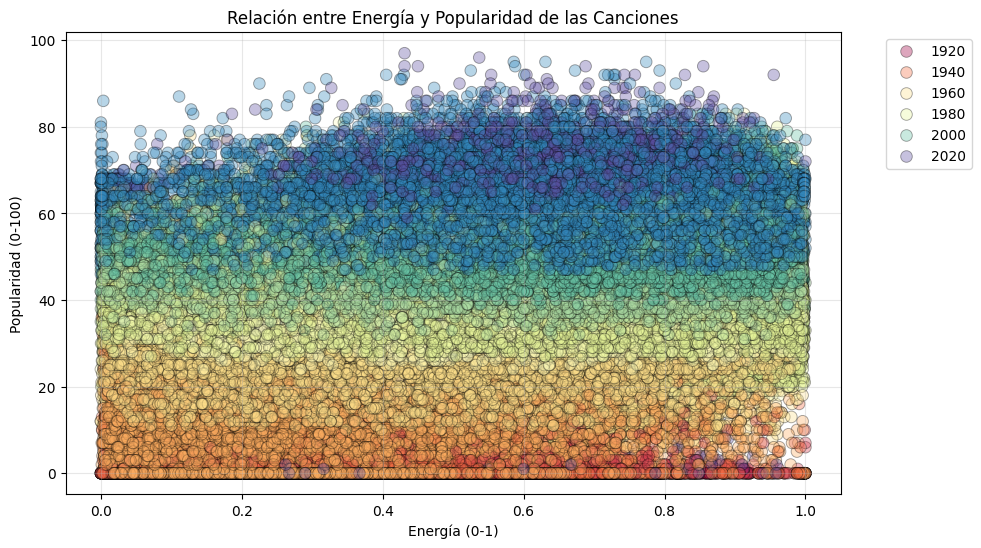

In [165]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='energy',        
    y='popularity',
    hue='decada',    
    alpha=0.35,        
    edgecolor='black', 
    s=70,
    palette='Spectral'              
)

plt.title('Relación entre Energía y Popularidad de las Canciones')
plt.xlabel('Energía (0-1)')
plt.ylabel('Popularidad (0-100)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Podemos observar:
-   Las canciones cuanto más poplaes son, tienen a tener mayor energía
-   Una distribución pareja de popularidad y enegía en las canciones entre los rangos de 80 en popularidad para abajo, casi no existe una depenencia de la energia para que una canción sea popular

### 18 ¿Cuál es la tendencia de cambio en la duración de las canciones a lo largo de los años? 
Utiliza un gráfico de línea para mostrar esta tendencia.

In [166]:
# answer18=[
#     (
#         df[df['year']==anio]
#         .sort_values(by='year',ascending=False)
#         .duration_ms
#         .mean()
#     )
#     for anio in df.year.unique()
# ]
# pd.Series(answer18, index=df.year.unique()).plot(kind='line', figsize=(10, 6), marker='o')

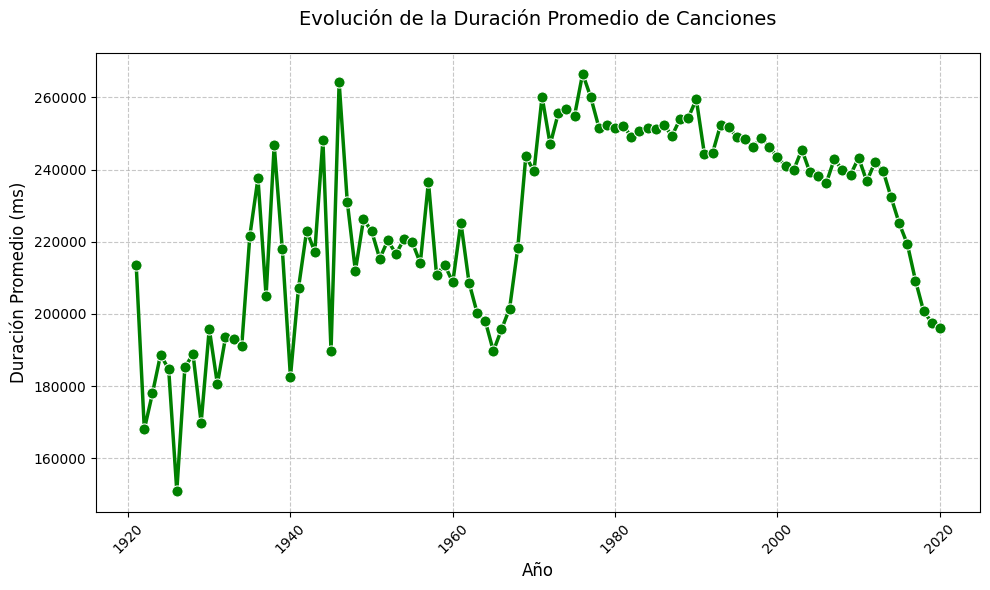

In [167]:
duracion_promedio_por_ano = df.groupby('year')['duration_ms'].mean()
duracion_promedio_df = duracion_promedio_por_ano.reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=duracion_promedio_df,
    x='year',
    y='duration_ms',
    marker='o',
    markersize=8,
    linewidth=2.5,
    color='green'
)

plt.title('Evolución de la Duración Promedio de Canciones', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Duración Promedio (ms)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar:
-   Que la duración promedio de los años 1920 es incluso mayor que la duración de las canciones de los últimos años
-   El promedio de duración más bajo con diferencia es en el año 1926
-   podriamos que decir que apartir del año 1926 parece haber una tendencia de subia en la duración promedio de manera gradual hasta el año 1965, con un punto mayor considerable en el año 1946.
-   Después de ese punto bajo en 1946 se observa una tendencia en subir la duración hasta el año 1976 en su punto más alto y desde ahí comienza a bajar la duración promedio gradualmente hasta el año 2020

### 19  ¿Cuál es la energía promedio de todas las canciones de 'Michael Jackson'?
Para obtener el promedio de los valores en una columna de tipo numerico, puede utilizar el metodo

`df["nombre de la columna"].mean()`

In [168]:
# tu código aquí
answer19=df[filtro_michael_jackson].energy.mean()
print(f"La energía promedio de las canciones de Michael Jackson es: {round(answer19,2)}")

La energía promedio de las canciones de Michael Jackson es: 0.69


### 20 ¿Cuántos artistas únicos están representados en el dataframe?
Para contar los elementos unicos en un dataframe puedes utilizar el metodo:

`df["nombre de la columna"].unique()`


In [169]:
# tu código aquí
answer20=len(df.artist.unique())
print(f"La cantidad de artistas únicos es: {answer20}")

La cantidad de artistas únicos es: 19695
